In [7]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Cargar dataset
academic_performance = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

# 2. Escalado estándar
scaler_std = StandardScaler()
academic_performance['attendance_percentage_std'] = scaler_std.fit_transform(
    academic_performance[['attendance_percentage']]
)

# 3. Crear nuevas características
academic_performance['study_hours_per_screen_time_hours_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['screen_time']
academic_performance['study_hours_per_motivation_level_ratio'] = academic_performance['study_hours_per_day'] / academic_performance['motivation_level']

# 4. Variables predictoras y objetivo
X = academic_performance[['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage_std', 'sleep_hours',
                        'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'stress_level', 'social_activity', 'screen_time',
                        'motivation_level', 'exam_anxiety_score', 'time_management_score', 'study_hours_per_screen_time_hours_ratio',
                        'study_hours_per_motivation_level_ratio']].values
y = academic_performance['exam_score'].values

# 5. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Crear modelo de regresión lineal en TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Capa lineal
])

# 7. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 8. Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=1)

# 9. Evaluar
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Error absoluto medio: {mae}")

# 10. Guardar modelo para usar en backend
model.save("modelo_tf.h5")


Epoch 1/100


c:\Users\Antel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - loss: 2128.9592 - mae: 38.6547
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - loss: 174.3020 - mae: 10.6954
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 154.1523 - mae: 9.9938 
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 131.8577 - mae: 9.2462
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 111.2770 - mae: 8.4930
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - loss: 95.5194 - mae: 7.8679
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step - loss: 83.4796 - mae: 7.3551
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - loss: 73.8903 - mae: 6.9175
Epoch 9/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - loss: 66.1163 - mae: 6.5402
Epoch 10/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - loss: 59.5153 - mae: 6.2027
Epoch 11/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - loss: 53.8840 - mae: 5.9016
Epoch 12/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 

Error absoluto medio: 3.215899705886841


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


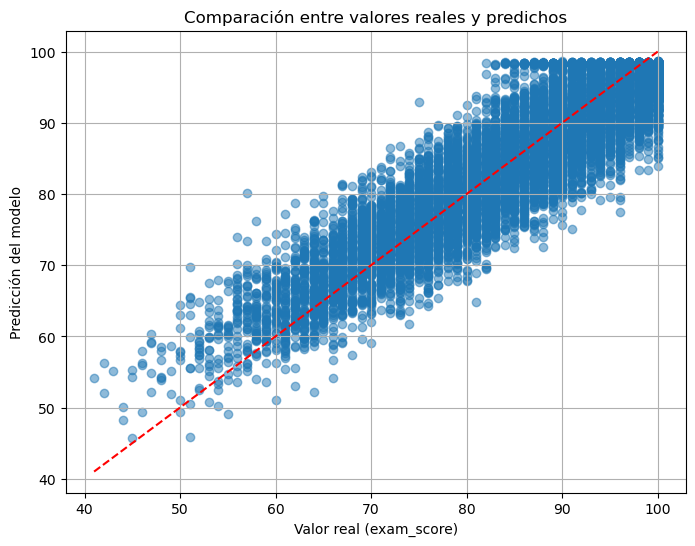

In [8]:
import matplotlib.pyplot as plt

# Obtener predicciones del modelo sobre datos de prueba
y_pred = model.predict(X_test).flatten()  # Flatten para tener un arreglo 1D

# Graficar valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea referencia y=x
plt.xlabel('Valor real (exam_score)')
plt.ylabel('Predicción del modelo')
plt.title('Comparación entre valores reales y predichos')
plt.grid(True)
plt.show()


In [9]:
import pandas as pd

# Obtener predicciones (aplanar para que sea 1D)
y_pred = model.predict(X_test).flatten()

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_pred
})

# Mostrar los primeros 10 registros
print(resultados.head(10))


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
   Valor Real  Predicción
0         100   98.281242
1          79   75.778015
2          66   69.952858
3          89   98.319023
4          97   98.255775
5         100   98.167412
6          74   69.633224
7          67   63.673679
8          76   74.779510
9          92   97.976219
